In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub


ModuleNotFoundError: No module named 'pandas'

In [ ]:
path = kagglehub.dataset_download("gowrishankarp/newspaper-text-summarization-cnn-dailymail")


In [ ]:
import os

print("Downloaded path:", path)
print("Contents:")
print(os.listdir(path))


Downloaded path: /kaggle/input/newspaper-text-summarization-cnn-dailymail
Contents:
['cnn_dailymail']


In [ ]:
import os

print("Downloaded path:", path)
print("Contents:")
print(os.listdir(path))


Downloaded path: /kaggle/input/newspaper-text-summarization-cnn-dailymail
Contents:
['cnn_dailymail']


In [ ]:
for root, dirs, files in os.walk(path):
    for name in files:
        print(os.path.join(root, name))



/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/validation.csv
/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/train.csv
/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/test.csv


In [ ]:
df= pd.read_csv('/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/train.csv')

In [ ]:
df.head()

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [ ]:
#EXploratory Data analysis of dF_train


In [ ]:
# Basic structure
df.info()

# Summary statistics (not very useful for text but still useful to see nulls, types)
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287113 entries, 0 to 287112
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          287113 non-null  object
 1   article     287113 non-null  object
 2   highlights  287113 non-null  object
dtypes: object(3)
memory usage: 6.6+ MB


,id,article,highlights
count,287113,287113,287113
unique,287113,284005,282197
top,ffffd563a96104f5cf4493cfa701a65f31b06abf,(CNN) -- Conjoined Egyptian twin boys Hassan a...,This page includes the show Transcript and the...
freq,1,3,83


In [ ]:
try:
    total_nulls = df.isnull().sum()
    missing_percentage = (total_nulls / len(df)) * 100

    if total_nulls.sum() == 0:
        raise ValueError("No missing values found.")

    print("Total missing values:\n", total_nulls)
    print("\nPercentage of missing values:\n", missing_percentage)

except ValueError as e:
    print(e)

else:
    print("\nMissing value check completed successfully.")


No missing values found.


In [ ]:
try:
    duplicate_count = df.duplicated().sum()

    if duplicate_count == 0:
        raise ValueError("No duplicated rows found.")

    print(f"Total duplicated rows: {duplicate_count}")
    print("\nDuplicated rows:\n", df[df.duplicated()])

except ValueError as e:
    print(e)

else:
    print("\nDuplicate check completed successfully.")


No duplicated rows found.


In [ ]:
# Add lengths
df['article_len'] = df['article'].apply(lambda x: len(str(x).split()))
df['highlight_len'] = df['highlights'].apply(lambda x: len(str(x).split()))

# Basic stats
df[['article_len', 'highlight_len']].describe()


,article_len,highlight_len
count,287113.000000,287113.000000
mean,691.869494,51.574101
std,336.500035,21.256336
min,8.000000,4.000000
25%,443.000000,38.000000
50%,632.000000,48.000000
75%,877.000000,60.000000
max,2347.000000,1296.000000


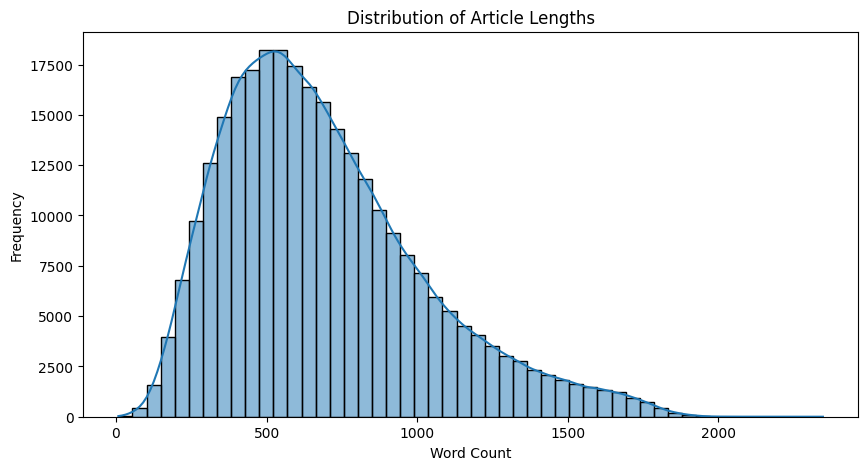

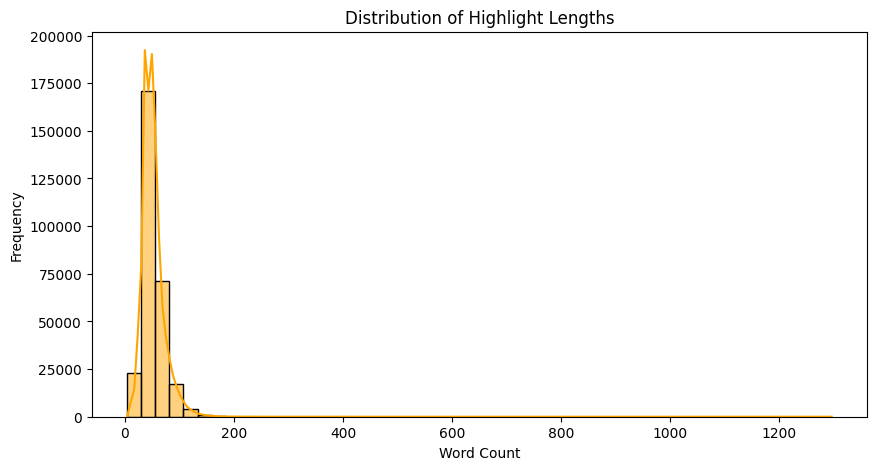

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Article lengths
plt.figure(figsize=(10,5))
sns.histplot(df['article_len'], bins=50, kde=True)
plt.title('Distribution of Article Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Highlight lengths
plt.figure(figsize=(10,5))
sns.histplot(df['highlight_len'], bins=50, kde=True, color='orange')
plt.title('Distribution of Highlight Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


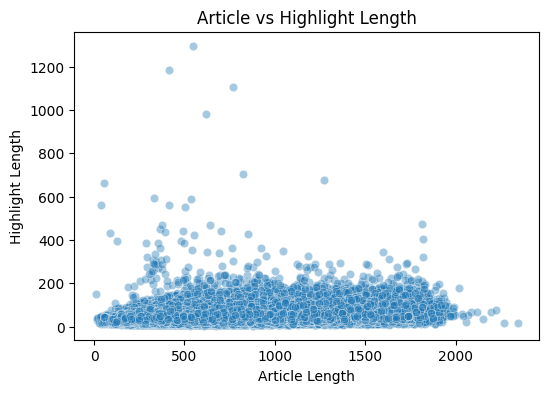

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='article_len', y='highlight_len', alpha=0.4)
plt.title('Article vs Highlight Length')
plt.xlabel('Article Length')
plt.ylabel('Highlight Length')
plt.show()


In [ ]:
from wordcloud import WordCloud

# Word cloud for articles
text = " ".join(df['article'].astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Articles')
plt.show()

# Word cloud for highlights
text = " ".join(df['highlights'].astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Highlights')
plt.show()


NameError: name 'df' is not defined

In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Apply to one sample
print("Before:", df['article'][0][:300])
print("\nAfter:", clean_text(df['article'][0])[:300])


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Create new columns for length analysis
df['article_len'] = df['article'].apply(lambda x: len(str(x).split()))
df['highlight_len'] = df['highlights'].apply(lambda x: len(str(x).split()))


In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df['article_len'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Article Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df['highlight_len'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Highlight (Summary) Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot([df['article_len'], df['highlight_len']], labels=['Article', 'Highlight'])
plt.title('Boxplot of Word Counts')
plt.ylabel('Number of Words')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['article_len'], df['highlight_len'], alpha=0.3, color='purple')
plt.title('Article Length vs. Highlight Length')
plt.xlabel('Article Length (words)')
plt.ylabel('Highlight Length (words)')
plt.grid(True)
plt.show()


In [ ]:
top_articles = df.sort_values(by='article_len', ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.barh(top_articles['id'], top_articles['article_len'], color='darkcyan')
plt.gca().invert_yaxis()
plt.title('Top 20 Longest Articles by Word Count')
plt.xlabel('Word Count')
plt.ylabel('Article ID')
plt.tight_layout()
plt.show()


In [ ]:
sample_df = df.sample(100, random_state=42).sort_index()

plt.figure(figsize=(12, 6))
plt.plot(sample_df.index, sample_df['article_len'], label='Article Length', color='blue')
plt.plot(sample_df.index, sample_df['highlight_len'], label='Highlight Length', color='red')
plt.title('Article vs Highlight Lengths Over Sample Index')
plt.xlabel('Sample Index')
plt.ylabel('Word Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
mean_len = df['article_len'].mean()
above = (df['article_len'] > mean_len).sum()
below = (df['article_len'] <= mean_len).sum()

plt.figure(figsize=(6, 6))
plt.pie([above, below], labels=['Above Avg', 'Below/Equal Avg'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Articles Longer Than Average')
plt.show()


In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['article_len', 'highlight_len']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()
